In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading dataset from github
df= pd.read_csv("https://github.com/vik-sin/StudentsPerformance/raw/master/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df= df.rename(columns= {'gender': 'Gender', 'race/ethnicity': 'RaceEthnicity',  'parental level of education': 'ParentalEducation' ,'lunch': 'Lunch' , 'test preparation course': 'TestPrepCourse' , 'math score':'MathsScore', 'reading score': 'ReadingScore' , 'writing score': 'WritingScore'})

In [4]:
df.head()

,Gender,RaceEthnicity,ParentalEducation,Lunch,TestPrepCourse,MathsScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data= df.iloc[0: , 5:]
data.head()

,MathsScore,ReadingScore,WritingScore
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


# **Applying Clustering Algorithms**





## 1. K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

wcss = []
kValueRange = range(1,12)
for k in kValueRange:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(data)
    wcss.append(km.inertia_)

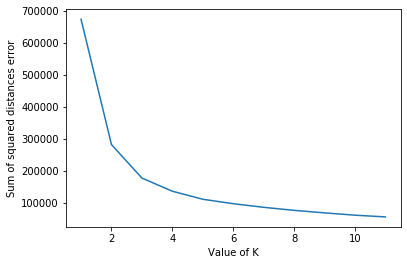

In [7]:
plt.xlabel('Value of K')
plt.ylabel('Sum of squared distances error')
plt.plot(kValueRange,wcss)

In [8]:
for i in range(1,len(wcss)):
    val= wcss[i]- wcss[i-1]
    print(("%d to %d is %d")%(i-1, i,-val))

0 to 1 is 391366
1 to 2 is 104450
2 to 3 is 41137
3 to 4 is 25054
4 to 5 is 13891
5 to 6 is 11281
6 to 7 is 9521
7 to 8 is 7775
8 to 9 is 7285
9 to 10 is 5393


In [9]:
# After k=5, value of squared error is decreasing.
# Hence, we are going to use k=5
km=KMeans(n_clusters=5, n_init=20)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
print("Size of km.labels_ : ",km.labels_.size)
print("Count of values :")
pd.Series(km.labels_).value_counts()

Size of km.labels_ :  1000
Count of values :


2    287
4    271
0    218
1    165
3     59
dtype: int64

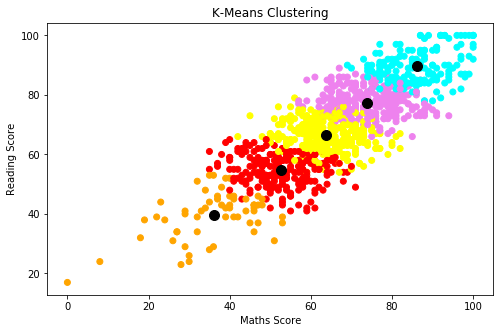

In [11]:
#plotting datapoints
colors= ['red', 'cyan', 'yellow', 'orange', 'violet']
labels= ['Cluster1' ,'Cluster2', 'Cluster3', 'Cluster4','Cluster5']

colorLabel= [colors[km.labels_[i]] for i in range(len(km.labels_)) ]

plt.figure(figsize=(8,5))
plt.scatter(data['MathsScore'], data['ReadingScore'], color= colorLabel,marker='o')

#plotting centres of clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='black', marker='o')
plt.title("K-Means Clustering")
plt.xlabel("Maths Score")
plt.ylabel('Reading Score')
plt.show()

## 2. Hierarchical Clustering

In [12]:
import scipy.cluster.hierarchy as sch

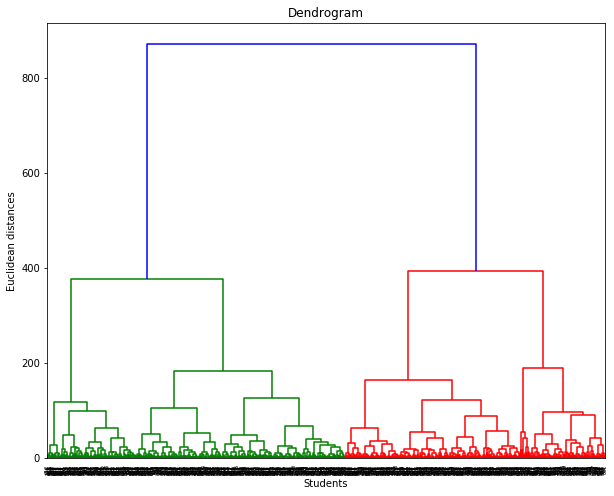

In [13]:
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean distances')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')

In [15]:
hc.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [16]:
y_hc=hc.fit_predict(data)
# y_hc

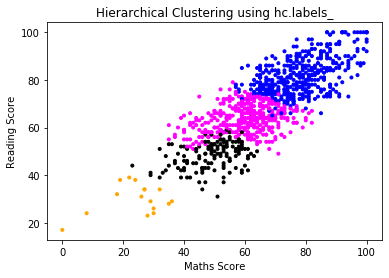

In [28]:
# Plotting Graph
colors= ['blue', 'magenta', 'orange', 'black']
labels= ['Cluster1' ,'Cluster2', 'Cluster3', 'Cluster4']

colorLabel= [colors[hc.labels_[i]] for i in range(len(hc.labels_)) ]

plt.scatter(data['MathsScore'], data['ReadingScore'], color= colorLabel, marker='.')
plt.title("Hierarchical Clustering using hc.labels_")
plt.xlabel("Maths Score")
plt.ylabel('Reading Score')
plt.show()

# DBSCAN Clustering

In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=100)
dbscan.fit(data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=None, p=None)

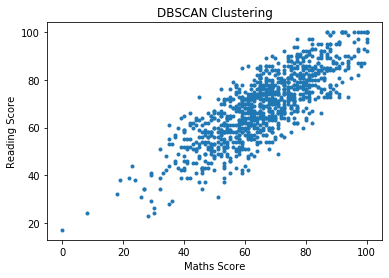

In [19]:
colorLabel= [colors[dbscan.labels_[i]] for i in range(len(dbscan.labels_)) ]

plt.scatter(data['MathsScore'], data['ReadingScore'], marker='.')
plt.title("DBSCAN Clustering")
plt.xlabel("Maths Score")
plt.ylabel('Reading Score')
plt.show()